<a href="https://colab.research.google.com/github/saraadastan/sara/blob/master/RW%2BBB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! git clone https://gitlab.synchrotron-soleil.fr/PA/collective-effects/mbtrack2.git

Cloning into 'mbtrack2'...
remote: Enumerating objects: 1364, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 1364 (delta 8), reused 0 (delta 0), pack-reused 1340
Receiving objects: 100% (1364/1364), 654.27 KiB | 1.52 MiB/s, done.
Resolving deltas: 100% (937/937), done.


In [2]:
%cd mbtrack2

/content/mbtrack2


In [3]:
import numpy as np
from mbtrack2.tracking import Synchrotron, Electron
from mbtrack2.utilities import Optics

In [4]:
#%%Elettra 2.0 parameters

h = 432 # Harmonic number of the accelerator.
L = 259.2 # Ring circumference in [m].
E0 = 2.4e9 # Nominal (total) energy of the ring in [eV].
particle = Electron() # Particle considered.
ac = 0.00013968121 # Momentum compaction factor.
U0 = 0.45021768 # Energy loss per turn in [eV].
tau = np.array([5.621e-3, 9.217e-3, 6.777e-3]) # Horizontal, vertical and longitudinal damping times in [s].
tune = np.array([32.27, 9.15]) # Horizontal and vertical tunes.
emit = np.array([2.2670e-10, 2.267e-12]) # Horizontal and vertical equilibrium emittance in [m.rad].
sigma_0 = 3.1152e-12 # Natural bunch length in [s].
sigma_delta = 1.9285e-3 # Equilibrium energy spread.
chro = [0.93, 2.43] # Horizontal and vertical (non-normalized) chromaticities.

local_beta = np.array([9.37, 2.004]) # Beta function at the tracking location.
local_alpha = np.array([0, 0]) # Alpha function at the tracking location.
local_dispersion = np.array([0, 0, 0, 0]) # Dispersion function and its derivative at the tracking location.
optics = Optics(local_beta=local_beta, local_alpha=local_alpha, 
                  local_dispersion=local_dispersion)

ring = Synchrotron(h=h, optics=optics, particle=particle, L=L, E0=E0, ac=ac, 
                   U0=U0, tau=tau, emit=emit, tune=tune, 
                   sigma_delta=sigma_delta, sigma_0=sigma_0, chro=chro)

In [5]:
from mbtrack2.tracking import Bunch

mybunch = Bunch(ring,  mp_number=1e7, current=1e-3)
mybunch.init_gaussian()

In [6]:
import numpy as np
from mbtrack2.impedance.wakefield import (WakeField, Impedance, 
                                                   WakeFunction)
from mbtrack2.impedance import Resonator
from mbtrack2.tracking import WakePotential
from mbtrack2.impedance import CircularResistiveWall

In [7]:
time = np.linspace(0, 100e-12, 10000) # Time points where the wake function will be evaluated in [s].
frequency = np.linspace(0.1e5, 100e9, 10000) # Frequency points where the impedance will be evaluated in [Hz].
re=Resonator(time, frequency, Rs=0.8, fr=7e9, Q=1, plane='long', atol=1e-20)
length = ring.L # Beam pipe length in [m].
rho = 1.72e-8 # Effective resistivity to consider in [ohm.m] as in [1].
radius = 7.5e-3 # Beam pipe radius in [m].
exact = True # If False, approxmiated formulas are used for the wake function computations.
rw = CircularResistiveWall(time, frequency, length, rho, radius, exact)
rw.drop("Wydip")
rw.drop("Wxdip")

In [8]:
wake = re.Wlong + rw.Wlong

In [9]:
imp = re.Zlong + rw.Zlong

In [10]:
imp.data

,real,imag
frequency [Hz],,
1.000000e+04,0.143330,0.143331
1.001100e+07,4.534995,4.536138
2.001200e+07,6.411854,6.414135
3.001300e+07,7.852238,7.855653
4.001400e+07,9.066615,9.071162
...,...,...
9.996000e+10,453.163403,453.103440
9.997000e+10,453.186071,453.126114
9.998000e+10,453.208738,453.148788


In [11]:
wake.data

,real,imag
time [s],,
0.000000e+00,8.282929e+16,0.0
1.000100e-14,1.412583e+17,0.0
2.000200e-14,1.021232e+17,0.0
3.000300e-14,6.074260e+16,0.0
4.000400e-14,2.316869e+16,0.0
...,...,...
9.996000e-11,-2.299325e+11,0.0
9.997000e-11,-2.298963e+11,0.0
9.998000e-11,-2.298601e+11,0.0


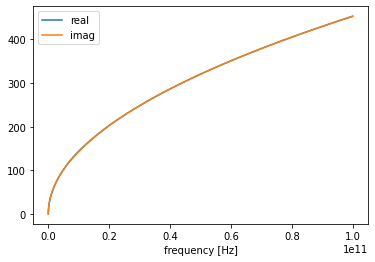

In [12]:
imp.data.plot()

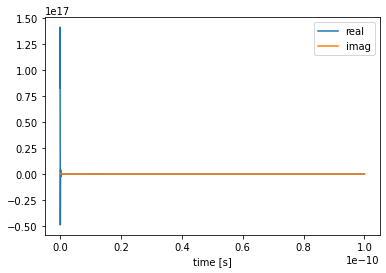

In [13]:
wake.data.plot()

In [14]:
wake.from_wakepotential

<bound method WakeFunction.from_wakepotential of <mbtrack2.impedance.wakefield.WakeFunction object at 0x7f9eed547ac0>>

In [15]:
total = WakeField([imp, wake])

In [16]:
total.Zlong.data

,real,imag
frequency [Hz],,
1.000000e+04,0.143330,0.143331
1.001100e+07,4.534995,4.536138
2.001200e+07,6.411854,6.414135
3.001300e+07,7.852238,7.855653
4.001400e+07,9.066615,9.071162
...,...,...
9.996000e+10,453.163403,453.103440
9.997000e+10,453.186071,453.126114
9.998000e+10,453.208738,453.148788


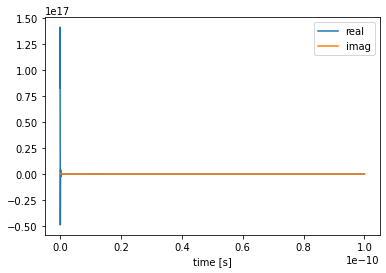

In [17]:
total.Wlong.data.plot()

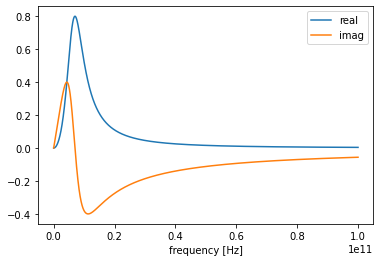

In [18]:
re.Zlong.data.plot()

In [19]:
wp = WakePotential(ring, wakefield=total, n_bin=60)

In [20]:
wp.wakefield.Wlong.data

,real,imag
time [s],,
0.000000e+00,8.282929e+16,0.0
1.000100e-14,1.412583e+17,0.0
2.000200e-14,1.021232e+17,0.0
3.000300e-14,6.074260e+16,0.0
4.000400e-14,2.316869e+16,0.0
...,...,...
9.996000e-11,-2.299325e+11,0.0
9.997000e-11,-2.298963e+11,0.0
9.998000e-11,-2.298601e+11,0.0


In [ ]:
wp.track(mybunch)

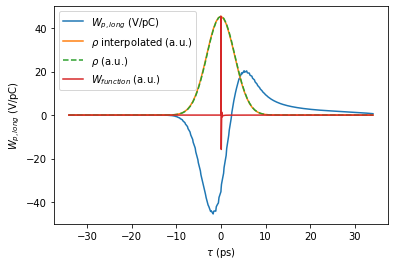

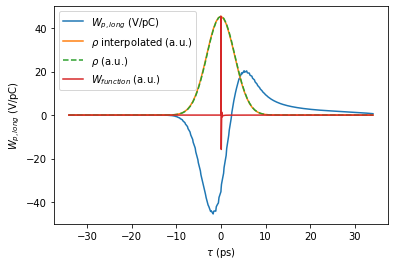

In [ ]:
wp.plot_last_wake('Wlong')

In [ ]:
wp.reference_loss(mybunch)

,TD factor,FD factor,Relative error [%]
Wlong [V/C],2.077447e+13,2.005142e+13,3.606003


In [ ]:
from mbtrack2.tracking import WakePotentialMonitor, BunchMonitor

In [ ]:
wp_mon =  WakePotentialMonitor(bunch_number=0, wake_types=["Wlong"], n_bin=60, save_every=1, buffer_size=10, total_size=20000, file_name="track", mpi_mode=False)
bunchmonitor = BunchMonitor(bunch_number=0, total_size=20000, save_every=1, buffer_size=10, mpi_mode=False)

In [ ]:
from mbtrack2.tracking import LongitudinalMap, RFCavity, SynchrotronRadiation

In [ ]:
LongMap = LongitudinalMap(ring)
RF = RFCavity(ring, m=1, Vc=2e6, theta=np.arccos(ring.U0/2e6))
SR = SynchrotronRadiation(ring)

In [ ]:
turns = 20000
for i in range(turns):
  LongMap.track(mybunch)
  SR.track(mybunch)
  RF.track(mybunch)
  print(i)

  # collective effects part
  wp1.track(mybunch)
  wp_mon.track(mybunch,wp1,wp2)
  bunchmonitor.track(mybunch)
bunchmonitor.close()